In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_diamonds = sns.load_dataset('diamonds')
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [3]:
x = df_diamonds['carat'].values.reshape(-1,1)
y = df_diamonds['price'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [4]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train) #Crea el modelo
Y_pred = regressor.predict(X_train)

print("Coefficientes:", regressor.coef_)
print("Independt term:", regressor.intercept_)
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(Y_train, Y_pred))

Coefficientes: [[7741.37904828]]
Independt term: [-2247.70447085]
Mean Squared Error (MSE): 2408781.08


In [5]:
print(regressor.score(X_test, Y_test))
print('Varianza calificación: %.2f' % r2_score(Y_train, Y_pred))

0.8509771156910653
Varianza calificación: 0.85


Text(0.5, 0.98, 'Modelo de Regresión Lineal - Diamonds Dataset')

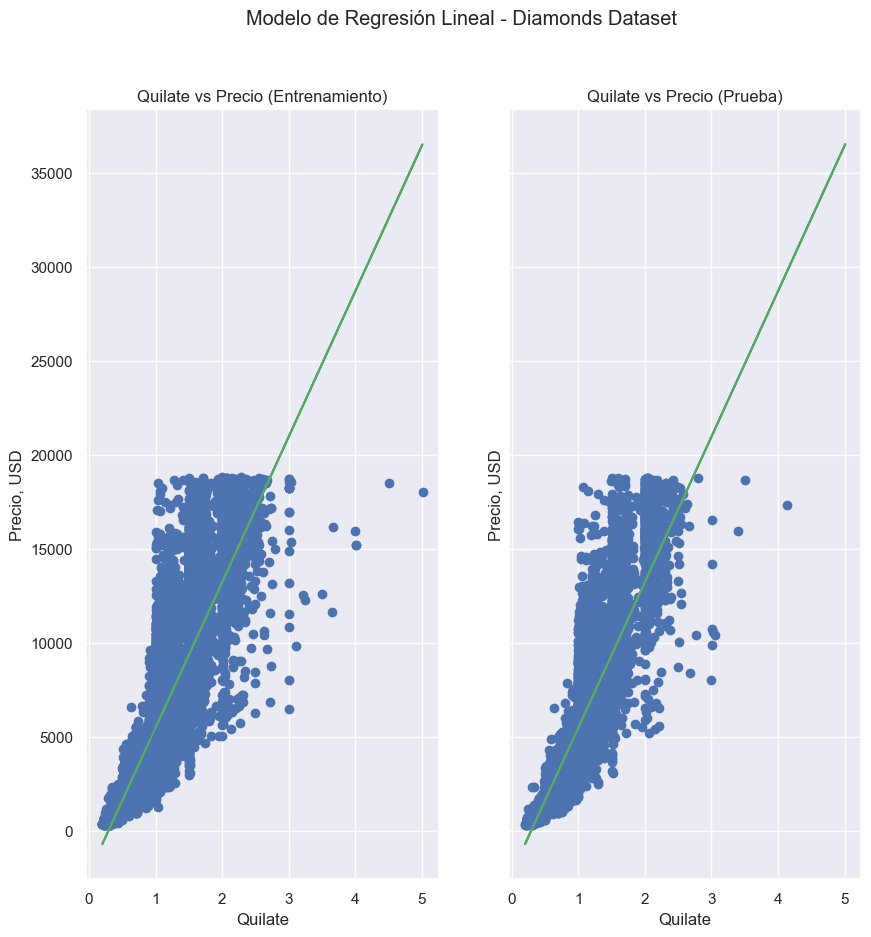

In [6]:
sns.set_theme()
fig, ax = plt.subplots(1,2, figsize=(10,10), sharey=True)
ax[0].scatter(X_train, Y_train)
ax[0].plot(X_train,regressor.predict(X_train), c='g')
ax[0].set_title("Quilate vs Precio (Entrenamiento)")
ax[0].set_xlabel("Quilate")
ax[0].set_ylabel("Precio, USD")
ax[1].scatter(X_test, Y_test)
ax[1].plot(X_train,regressor.predict(X_train), c='g')
ax[1].set_title("Quilate vs Precio (Prueba)")
ax[1].set_xlabel("Quilate")
ax[1].set_ylabel("Precio, USD")
plt.suptitle("Modelo de Regresión Lineal - Diamonds Dataset")

In [7]:
xx = df_diamonds[['carat', 'z']].values
yy = df_diamonds['price'].values.reshape(-1,1)
XX_train, XX_test, YY_train, YY_test = train_test_split(xx, yy, test_size=0.3, random_state=0)
regressor.fit(XX_train, YY_train)
regressor.score(XX_test, YY_test)

0.855295875757326

# Conclusion

Gracias al hecho de que separamos las variables dependientes de las independientes, nos aseguramos que el modelo aprendiera únicamente a partir de los datos relevantes. Dicha división de datos en set de entrenamiento y set de prueba fue clave para evaluar el desempeño real del modelo y evitar sobreajuste.

El entrenamiento del modelo nos permitió que patrones dentro de los datos, como lo es el hecho que existe una relación directa entre los quilates y el precio del diamante, este siendo que a medida que aumentan los quilates, el precio tiende a incrementarse de forma significativa. Esta relación no es completamente lineal, ya que diamantes con un número similar de quilates pueden tener precios distintos debido a otras características físicas.

Aquí es donde nos ayuda la incorporación de una nueva variable, como lo fue la variable z del modelo, ya que logramos capturar una mayor variabilidad del precio, a su vez mejorando la capacidad predictiva del modelo. Esto ocurre porque z aporta información adicional sobre las dimensiones del diamante, permitiendo explicar diferencias de precio que no pueden ser justificadas únicamente por los quilates.